# a. Limpieza de Datos

---Imputar todo (dejar sin nulos)

---Pasar de categorico a número

---Estandarizar (Dejar todo en el mismo rango)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imputar todo

Nuestra base de datos no contiene nulos, sin embargo, se pueden notar ciertos valores en 0, los cuales no serán modificados, pues estas columnas son de respuesta en valores de 0 y 1


## b. Pasar de categorico a numérico (LABEL ENCODING)

In [ ]:
# Convertir ParentalEducation a números

df = pd.read_csv("test.csv")


# Definimos el diccionario de mapeo
# Aquí estableces el orden: menor nivel educativo = menor número.
mapeo_educacion = {
    '<HS': 0,
    'HS': 1,
    'SomeCollege': 2,
    'Bachelors+': 3
}

# Aplicamos el mapeo para crear una nueva columna numérica
df['ParentalEducation_Num'] = df['ParentalEducation'].map(mapeo_educacion)
# El argumento 'inplace=True' modifica el DataFrame directamente
df.drop(columns=['ParentalEducation'], inplace=True)



# Convertir Gender a números

# Creamos un DataFrame de ejemplo (reemplaza esto con tu DataFrame real)

# Definimos el diccionario de mapeo
# Aquí estableces el orden: menor nivel educativo = menor número.
mapeo_genero = {
    'Female': 0,
    'Male': 1
}

# Aplicamos el mapeo para crear una nueva columna numérica
df['Gender_Num'] = df['Gender'].map(mapeo_genero)
# Suponiendo que 'df' es tu DataFrame
# El argumento 'inplace=True' modifica el DataFrame directamente

df.drop(columns=['Gender'], inplace=True)

#Usar el mismo procedimiento para SchoolType

mapeo_School = {
    'Public': 0,
    'Private': 1
}

# Aplicamos el mapeo para crear una nueva columna numérica
df['SchoolType_Num'] = df['SchoolType'].map(mapeo_School)

# Eliminamos la columna SchoolType
df.drop(columns=['SchoolType'], inplace=True)

# Veamos el resultado
df.head()

,Age,Grade,Race,SES_Quartile,Locale,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,...,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut,ParentalEducation_Num,Gender_Num,SchoolType_Num
0,15,10,White,1,City,72.346053,62.217134,73.008079,2.521745,0.868836,...,0,1,1,1,0,3,3,1,0,0
1,16,11,Hispanic,1,City,77.889157,72.748030,76.303717,3.275626,0.909595,...,1,1,0,0,1,3,1,0,0,1
2,17,12,Black,2,Rural,72.966587,65.585472,68.099411,2.974137,0.870952,...,1,1,0,0,0,3,3,1,0,0
3,16,11,White,2,Town,96.674049,88.035852,100.000000,3.676590,1.000000,...,0,0,0,0,1,4,5,1,0,0
4,16,11,Black,3,Rural,81.989270,77.485372,72.715066,2.255014,0.897957,...,0,1,0,1,0,4,2,3,1,0


## **Estandarizar** (ONE HOT ENCODING)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)

encoded = encoder.fit_transform(df[["Race", "Locale"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Race", "Locale"]))

df_encoded = pd.concat([df.drop(["Race", "Locale"], axis=1), encoded_df], axis=1)

df_encoded.head()

,Age,Grade,SES_Quartile,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,StudyHours,InternetAccess,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_Two-or-more,Race_White,Locale_City,Locale_Rural,Locale_Suburban,Locale_Town
0,15,10,1,72.346053,62.217134,73.008079,2.521745,0.868836,0.310172,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,16,11,1,77.889157,72.748030,76.303717,3.275626,0.909595,1.175586,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17,12,2,72.966587,65.585472,68.099411,2.974137,0.870952,1.112556,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,11,2,96.674049,88.035852,100.000000,3.676590,1.000000,1.067679,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,16,11,3,81.989270,77.485372,72.715066,2.255014,0.897957,0.841936,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Guardar el dataframe estandarizado

In [ ]:
df_encoded.to_csv("test_estandarizado.csv", index=False)
df_encoded.head()

,Age,Grade,SES_Quartile,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,StudyHours,InternetAccess,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_Two-or-more,Race_White,Locale_City,Locale_Rural,Locale_Suburban,Locale_Town
0,15,10,1,72.346053,62.217134,73.008079,2.521745,0.868836,0.310172,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,16,11,1,77.889157,72.748030,76.303717,3.275626,0.909595,1.175586,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17,12,2,72.966587,65.585472,68.099411,2.974137,0.870952,1.112556,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,11,2,96.674049,88.035852,100.000000,3.676590,1.000000,1.067679,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,16,11,3,81.989270,77.485372,72.715066,2.255014,0.897957,0.841936,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## PERCENTILES PARA LA NOTA

In [ ]:
# --- Calcular percentiles y añadir columna de clasificación ---
df = pd.read_csv("test_estandarizado.csv")

# Calcular percentiles 20, 40, 60, 80
percentiles = np.percentile(df['TestScore_Math'], [20, 40, 60, 80])
print("Percentiles:", percentiles)

# Función para asignar el rango de percentil
def asignar_percentil(valor):
    if valor <= percentiles[0]:
        return "Reprobado"
    elif valor <= percentiles[1]:
        return "Casi reprobado"
    elif valor <= percentiles[2]:
        return "Aprobado"
    elif valor <= percentiles[3]:
        return "Alto"
    else:
        return "Excelente"

# Crear nueva columna con el percentil correspondiente
df['PercentileRange'] = df['TestScore_Math'].apply(asignar_percentil)

# Ver primeros resultados
print(df[['TestScore_Math', 'PercentileRange']].head())

# Guardar resultado final
df.to_csv("test_estandarizado_percentiles.csv", index=False)

Percentiles: [66.58692687 72.46124352 77.53852215 83.41569393]
   TestScore_Math PercentileRange
0       72.346053  Casi reprobado
1       77.889157            Alto
2       72.966587        Aprobado
3       96.674049       Excelente
4       81.989270            Alto


# #d. Eliminar categorias

No vamos a hacer uso de ningun algoritmo para disminuir las caracteristicas, pero en caso de neceseitarlo por alguna razón, aplicamos PCA y LDA para mirar cual nos serviria.
Nuestros dos objetivos van enfocados en predecir y clasificar. Según nuestras investigaciones, el PCA sirve para reducir las variables parta predecir, mientras que el LDA es únicamente para clasificar.
Es por eso que vamos a reducir las variables en ambos y mirar los resultados obtenidos, para así decidir si el uso de cada uno es necesario o no.

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Leer el archivo original
df = pd.read_csv("test.csv")

# Escalar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=["float64", "int64"]))

# Aplicar PCA (por ejemplo, 2 componentes principales)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

# Guardar el archivo con los resultados del PCA
pca_df.to_csv("test_pca.csv", index=False)

In [ ]:
print(pca_df)


             PC1       PC2
0      -2.030650 -0.927350
1       0.571757  0.550900
2      -0.976762  1.040870
3       4.165285  0.553766
4      -0.488701 -0.028898
...          ...       ...
999992  3.099578 -1.104153
999993 -2.515818  0.545530
999994 -5.242733  0.142970
999995 -1.862941 -2.175388
999996  1.986551 -1.591832

[999997 rows x 2 columns]


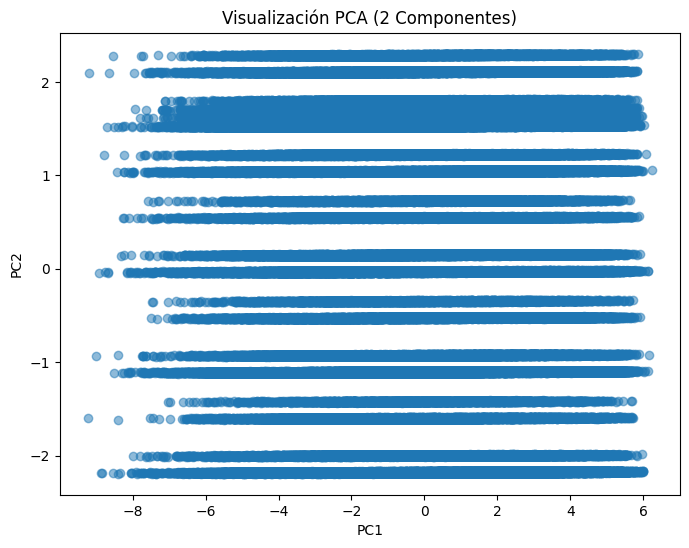

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('Visualización PCA (2 Componentes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


LDA

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("test_estandarizado_percentiles.csv")
df = df.fillna(df.mean(numeric_only=True))

# Usar la columna categórica existente como objetivo
y = df["PercentileRange"]

# Quitar la columna objetivo y las notas si existen
X = df.drop(columns=["PercentileRange", "TestScore_Math"], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

lda_df = pd.DataFrame(X_lda, columns=['LDA1'])
lda_df.to_csv("test_lda.csv", index=False)

print(lda_df.head())


       LDA1
0  1.540760
1 -0.579535
2  0.722887
3 -3.263483
4  0.782879


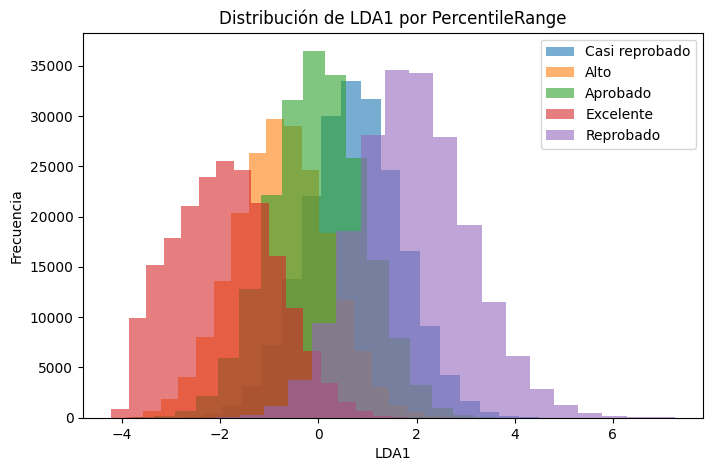

In [ ]:
import matplotlib.pyplot as plt

lda_df['PercentileRange'] = y  # agregar etiquetas para graficar

plt.figure(figsize=(8,5))
for label in lda_df['PercentileRange'].unique():
    plt.hist(lda_df.loc[lda_df['PercentileRange'] == label, 'LDA1'], bins=20, alpha=0.6, label=str(label))
plt.title("Distribución de LDA1 por PercentileRange")
plt.xlabel("LDA1")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


# Algoritmo de árbol de decisión

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# 1) Cargar datos
df = pd.read_csv("test_estandarizado.csv")  # o "test_estandarizado.csv"
target = "TestScore_Math"

X = df.drop(columns=[target])
y = df[target]

# 2) (Opcional) Imputación simple sin pipeline
# Si no tienes NaN, puedes omitir estas dos líneas
X = X.copy()
for c in X.columns:
    if X[c].dtype.kind in "biufc":  # solo numéricas
        X[c] = X[c].fillna(X[c].median())

# 3) Split (opcional, para validar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) Entrenar XGBoost
xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

# 5) Importancias de variables
importances = xgb.feature_importances_
feat_import = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("Top 15 features por importancia:")
print(feat_import.head(15))

# 6) Selección automática con umbral (sin pipeline)
# Usa la mediana de importancias como corte (puedes cambiar a 'mean' o un valor numérico)
selector = SelectFromModel(xgb, threshold="median", prefit=True)
mask_keep = selector.get_support()
features_keep = X.columns[mask_keep].tolist()
features_drop = X.columns[~mask_keep].tolist()

print("\nMantener (>= mediana):", len(features_keep))
print(features_keep)
print("\nEliminar (< mediana):", len(features_drop))
print(features_drop)

# 7) Guardar resultados
feat_import.to_csv("feature_importances_xgb.csv", index=False)
pd.Series(features_drop, name="features_to_drop").to_csv("features_to_drop_xgb.csv", index=False)

# 8) (Opcional) Crear dataset reducido ya sin columnas débiles
df_reduced = pd.concat([X[features_keep], y], axis=1)
df_reduced.to_csv("dataset_reducido_xgb.csv", index=False)
print("\nGuardados: feature_importances_xgb.csv, features_to_drop_xgb.csv, dataset_reducido_xgb.csv")




Top 15 features por importancia:
                  feature  importance
6          AttendanceRate    0.725183
4       TestScore_Science    0.100528
3       TestScore_Reading    0.077792
5                     GPA    0.061347
7              StudyHours    0.009075
21             Race_Other    0.001275
17         SchoolType_Num    0.001254
15  ParentalEducation_Num    0.001208
19             Race_Black    0.001206
23             Race_White    0.001201
10            PartTimeJob    0.001189
27            Locale_Town    0.001187
26        Locale_Suburban    0.001176
25           Locale_Rural    0.001175
13               FreeTime    0.001165

Mantener (>= mediana): 14
['TestScore_Reading', 'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours', 'PartTimeJob', 'ParentalEducation_Num', 'SchoolType_Num', 'Race_Black', 'Race_Other', 'Race_White', 'Locale_Rural', 'Locale_Suburban', 'Locale_Town']

Eliminar (< mediana): 14
['Age', 'Grade', 'SES_Quartile', 'InternetAccess', 'Extracurricular', 'Par

# Train - Test

In [ ]:
from sklearn.model_selection import train_test_split


y = df['TestScore_Math']
X = df.drop(columns = ['TestScore_Math'])

# División 80% entrenamiento, 20% prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("Tamaño de X_train:", len(X_train))
print("Tamaño de X_val:", len(X_val))
print("Tamaño de X_test:", len(X_test))

Tamaño de X_train: 639997
Tamaño de X_val: 160000
Tamaño de X_test: 200000


In [ ]:
X_train.to_csv("X_train.csv", index=False)
Y_train.to_csv("Y_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
Y_val.to_csv("Y_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
Y_test.to_csv("Y_test.csv", index=False)
